# Hands-on 4: Logistic Regression Notebook (Tutorial)

**Alumno:** _Herrera Covarrubias Kevin Shalom_  
**Curso / Profesor:** _Clasificacion Inteligente de Datos / Jose Antonio Aviña Mendez_



## Fundamentos de la técnica

La **Logistic Regression** es un modelo de **clasificación binaria**.  
Aunque se llama "regresión", en realidad se usa para **predecir probabilidades** de pertenecer a una clase (por ejemplo, comprar = 1, no comprar = 0).

- Toma una combinación lineal de las variables de entrada (edad, salario, etc.).  
- Pasa ese resultado por una **función sigmoide** que lo transforma en un valor entre 0 y 1.  
- Ese valor se interpreta como una **probabilidad**; normalmente se clasifica como 1 si la probabilidad es mayor o igual a 0.5 y como 0 en caso contrario.

Es uno de los modelos de clasificación más usados porque es:
- **Simple**,  
- **Rápido**,  
- Y sus parámetros son fáciles de interpretar.


## Modelo matemático

La Logistic Regression modela la probabilidad de que $y=1$ dado $\mathbf{x}$ como:

$$
P(y=1 \mid \mathbf{x}) = \sigma(\mathbf{w}^\top \mathbf{x} + b)
$$

donde $\sigma(\cdot)$ es la **función sigmoide**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}.
$$

La regla de decisión suele ser:

$$
\hat{y} =
\begin{cases}
1, & \text{si } P(y=1 \mid \mathbf{x}) \ge 0.5,\\
0, & \text{en otro caso.}
\end{cases}
$$

En `scikit-learn`, los parámetros $\mathbf{w}$ y $b$ se aprenden maximizando la **verosimilitud** (o equivalentemente, minimizando una función de pérdida logarítmica).


## Librería, clases y funciones usadas

En este tutorial empleamos:

- `sklearn.linear_model.LogisticRegression`: implementación del modelo de Logistic Regression.
- `sklearn.preprocessing.StandardScaler`: estandariza las variables (media 0, desviación estándar 1).
- `sklearn.pipeline.Pipeline`: permite encadenar el `Scaler` + el modelo en un solo objeto.
- `sklearn.model_selection.train_test_split`: separa datos en entrenamiento y prueba.
- `sklearn.metrics.confusion_matrix`, `accuracy_score`: métricas para evaluación.

También emplearemos:
- `pandas` para manejo de datos en DataFrames.
- `matplotlib.pyplot` para graficar.


## Pipeline

### a) Preprocesamiento

En esta sección:
- Cargamos el dataset `Social_Network_Ads.csv`.
- Calculamos estadísticas básicas (promedio, desviación, mínimo, máximo).
- Graficamos un **scatter** de `Age` vs `EstimatedSalary`, coloreado por `Purchased`.

> **Nota (Colab):** sube el archivo CSV y ajusta la ruta a `/content/Social_Network_Ads.csv`.


In [6]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = Path('/content/Social_Network_Ads.csv')

df = pd.read_csv(DATA_PATH)
print("Shape del dataset:", df.shape)
df.head()

Shape del dataset: (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
# Estadísticas básicas de Age y EstimatedSalary
stats = df[['Age', 'EstimatedSalary']].describe().T[['mean','std','min','max']]
print("Estadísticas (mean, std, min, max):\n")
print(stats)

Estadísticas (mean, std, min, max):

                      mean           std      min       max
Age                 37.655     10.482877     18.0      60.0
EstimatedSalary  69742.500  34096.960282  15000.0  150000.0


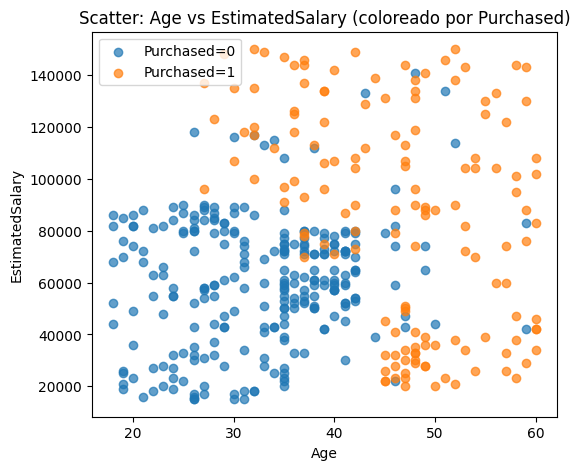

In [8]:
# Scatter: Age vs EstimatedSalary, coloreado por Purchased
plt.figure(figsize=(6,5))
for label, subdf in df.groupby('Purchased'):
    plt.scatter(subdf['Age'], subdf['EstimatedSalary'],
                alpha=0.7, label=f'Purchased={label}')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Scatter: Age vs EstimatedSalary (coloreado por Purchased)')
plt.legend()
plt.show()

**Explicación sencilla (Preprocesamiento):**

En esta parte solo estamos *conociendo* los datos antes de usarlos.
Vemos qué valores de edad y salario hay y dibujamos un gráfico.

La idea es:
- Mirar los números para saber si son pequeños, grandes, si hay valores raros, etc.
- Dibujar un punto por cada persona (edad vs. salario) y colorearlo según si compró o no.

Es como ver una foto del problema para entender mejor qué está pasando antes de construir el modelo.



### b) División en train/test y definición del Pipeline

Seleccionamos como variables de entrada (`X`) las columnas **`Age`** y **`EstimatedSalary`**, y como salida (`y`) la columna **`Purchased`**.


In [9]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (300, 2)
X_test shape: (100, 2)


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Definimos el pipeline: estandarizar + Logistic Regression
logreg_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(random_state=42))
])

# Entrenamos el modelo
logreg_clf.fit(X_train, y_train)
print("Entrenamiento completado.")

Entrenamiento completado.


**Explicación sencilla (División y Pipeline):**

Aquí hacemos dos cosas importantes:

1. **Separamos los datos en dos partes:**
   - Una parte para que el modelo *aprenda* (train).
   - Otra parte para comprobar después si realmente aprendió bien (test).

2. **Le decimos al modelo cómo trabajar:**
   - Que use solo la edad y el salario como información de entrada.
   - Que primero ponga esos números en una escala parecida (para que ningún número "domine" por ser muy grande).
   - Que aprenda a decidir si alguien compra (1) o no compra (0).

En pocas palabras: estamos preparando el “entrenamiento” del modelo, igual que prepararías ejercicios para que una persona practique antes de un examen.



### c) Prediction (función de clasificación)

Ahora creamos una **función en Python** que reciba un patrón (Edad, Salario) y muestre:
- La **clase predicha** (0 = No compra, 1 = Compra).
- La **probabilidad** estimada de comprar.


In [11]:
def predecir_usuario(modelo, age, est_salary, nombres=('NoPurchase','Purchase')):
    """Recibe Edad y Salario estimado y devuelve la clase y probabilidad de compra."""
    import numpy as np
    x_new = np.array([[age, est_salary]])
    probas = modelo.predict_proba(x_new)[0]  # [P(y=0), P(y=1)]
    pred = int(modelo.predict(x_new)[0])

    print(f"Entrada: Age={age}, EstimatedSalary={est_salary}")
    print(f"Probabilidad de NO comprar (0): {probas[0]:.3f}")
    print(f"Probabilidad de COMPRAR (1):   {probas[1]:.3f}")
    print(f"Clase predicha: {pred} -> {nombres[pred]}")
    return pred, probas

# Ejemplo con un usuario del set de prueba
_ = predecir_usuario(logreg_clf, X_test[0,0], X_test[0,1])

Entrada: Age=39, EstimatedSalary=75000
Probabilidad de NO comprar (0): 0.646
Probabilidad de COMPRAR (1):   0.354
Clase predicha: 0 -> NoPurchase


**Explicación sencilla (Predicción):**

En esta parte usamos el modelo ya entrenado para hacer predicciones sobre personas nuevas.

Lo que hace el modelo es:
- Recibe la edad y el salario de cada persona.
- Calcula qué tan probable cree que esa persona compre.
- Si esa probabilidad es mayor o igual al 50%, decide "compra".
- Si es menor al 50%, decide "no compra".

Es como preguntarle al modelo:  
“Con estos datos, ¿crees que esta persona comprará?”  
y obligarlo a responder al final solo con **sí** o **no**.



### d) Model Evaluation (Matriz de Confusión y Accuracy)

Evaluamos el modelo en el conjunto de prueba usando:
- **Accuracy**: proporción de aciertos.
- **Matriz de Confusión**: muestra cuántos casos se clasificaron correctamente y cuántos se confundieron entre clases.


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predicciones sobre el set de prueba
y_pred = logreg_clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy en test: {acc:.4f}")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

Accuracy en test: 0.8400
Matriz de Confusión:
[[60  4]
 [12 24]]


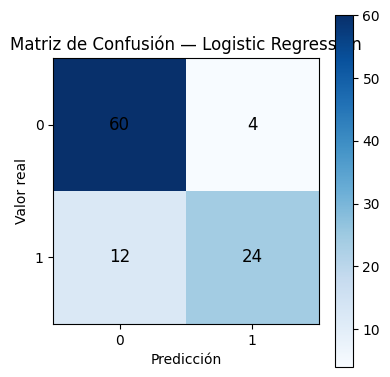

In [13]:
# Gráfico simple de la Matriz de Confusión con matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(cm, cmap='Blues')

ax.set_title('Matriz de Confusión — Logistic Regression')
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor real')

# Etiquetas de ejes (asumiendo clases 0 y 1)
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['0','1'])
ax.set_yticklabels(['0','1'])

# Mostrar los valores dentro de cada celda
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=12)

plt.colorbar(im)
plt.tight_layout()
plt.show()

**Explicación sencilla (Evaluación del modelo):**

Aquí revisamos qué tan bien está funcionando el modelo.

Hacemos dos cosas:
- Calculamos el **porcentaje de aciertos** (Accuracy):  
  de todas las personas, ¿en cuántas acertó el modelo?
- Miramos una **tabla de errores y aciertos** (matriz de confusión) donde vemos:
  - Cuántas personas que sí compraban el modelo las marcó bien como “compra”.
  - Cuántas personas que no compraban el modelo las marcó bien como “no compra”.
  - Y en qué casos se equivocó (por ejemplo, dijo “compra” cuando en realidad era “no compra”).

En resumen: es como corregir un examen y contar cuántas respuestas buenas y malas tuvo el modelo.



## 3. Referencias bibliográficas

- Hosmer, D. W., & Lemeshow, S. (2000). *Applied Logistic Regression*. Wiley.  
- Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.  
- Documentación de scikit-learn — Logistic Regression:  
  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
- User Guide de scikit-learn (sección de clasificación):  
  https://scikit-learn.org/stable/user_guide.html
